In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
import warnings
warnings.filterwarnings('ignore')
print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
df = pd.read_csv('spotify_churn_dataset.csv')

In [4]:
df.head()

,user_id,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,churned
0,user_1,Premium,US,134.9,4,Electronic,6,0,1,0
1,user_2,Premium,PK,165.7,5,Pop,8,0,12,0
2,user_3,Free,DE,45.9,3,Classical,3,0,3,0
3,user_4,Premium,PK,106.0,0,Jazz,7,0,3,0
4,user_5,Premium,US,89.6,5,Country,2,1,6,0


In [5]:
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("First 5 Rows:")
print(df.head())
print("\n" + "="*50)
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Statistical Summary:")
print(df.describe())
print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Churn Distribution:")
print(df['churned'].value_counts())

Dataset Shape: (1000, 10)

First 5 Rows:
  user_id subscription_type country  avg_daily_minutes  number_of_playlists  \
0  user_1           Premium      US              134.9                    4   
1  user_2           Premium      PK              165.7                    5   
2  user_3              Free      DE               45.9                    3   
3  user_4           Premium      PK              106.0                    0   
4  user_5           Premium      US               89.6                    5   

    top_genre  skips_per_day  support_tickets  days_since_last_login  churned  
0  Electronic              6                0                      1        0  
1         Pop              8                0                     12        0  
2   Classical              3                0                      3        0  
3        Jazz              7                0                      3        0  
4     Country              2                1                      6        0  

Dat

In [6]:
print(f"Duplicate rows: {df.duplicated().sum()}")

df = df.drop_duplicates()

print(f"\nNegative values in avg_daily_minutes: {(df['avg_daily_minutes'] < 0).sum()}")

median_minutes = df[df['avg_daily_minutes'] >= 0]['avg_daily_minutes'].median()
df.loc[df['avg_daily_minutes'] < 0, 'avg_daily_minutes'] = median_minutes

print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nData cleaning completed!")

Duplicate rows: 0

Negative values in avg_daily_minutes: 7

Missing values after cleaning:
user_id                  0
subscription_type        0
country                  0
avg_daily_minutes        0
number_of_playlists      0
top_genre                0
skips_per_day            0
support_tickets          0
days_since_last_login    0
churned                  0
dtype: int64

Data cleaning completed!


Text(0.5, 1.0, 'Churn Distribution')

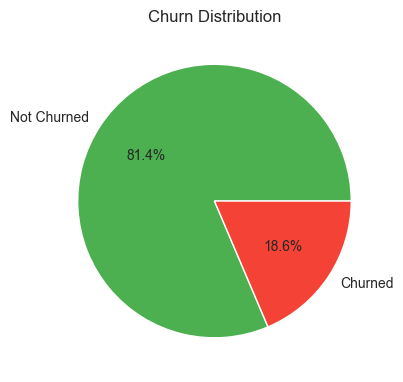

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
churn_counts = df['churned'].value_counts()
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
plt.title('Churn Distribution')

Text(0, 0.5, 'Count')

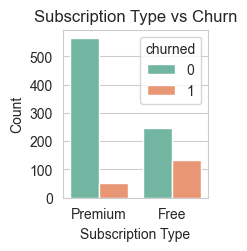

In [8]:
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='subscription_type', hue='churned', palette='Set2')
plt.title('Subscription Type vs Churn')
plt.xlabel('Subscription Type')
plt.ylabel('Count')

Text(0.5, 1.0, 'Avg Daily Minutes Distribution')

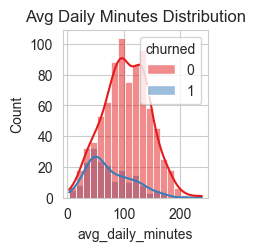

In [9]:
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='avg_daily_minutes', hue='churned', kde=True, palette='Set1')
plt.title('Avg Daily Minutes Distribution')

Text(0.5, 1.0, 'Days Since Last Login vs Churn')

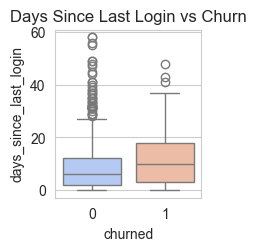

In [10]:
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='churned', y='days_since_last_login', palette='coolwarm')
plt.title('Days Since Last Login vs Churn')

Text(0.5, 1.0, 'Support Tickets vs Churn')

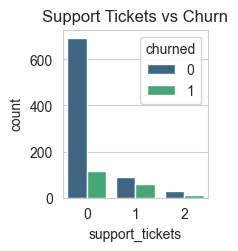

In [11]:
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='support_tickets', hue='churned', palette='viridis')
plt.title('Support Tickets vs Churn')

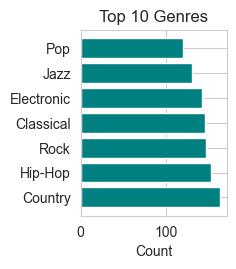

EDA visualizations saved as 'eda_visualizations.png'


In [12]:
plt.subplot(2, 3, 6)
top_genres = df['top_genre'].value_counts().head(10)
plt.barh(top_genres.index, top_genres.values, color='teal')
plt.title('Top 10 Genres')
plt.xlabel('Count')

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

print("EDA visualizations saved as 'eda_visualizations.png'")

In [13]:
df['engagement_score'] = (df['avg_daily_minutes'] * df['number_of_playlists']) / (df['skips_per_day'] + 1)

df['activity_level'] = pd.cut(df['avg_daily_minutes'], 
                               bins=[0, 30, 60, 120, 300], 
                               labels=['Very Low', 'Low', 'Medium', 'High'])

df['is_premium'] = (df['subscription_type'] == 'Premium').astype(int)

df['high_support_tickets'] = (df['support_tickets'] >= 2).astype(int)

df['inactive_user'] = (df['days_since_last_login'] > 20).astype(int)

print("New Features Created:")
print(df[['engagement_score', 'activity_level', 'is_premium', 'high_support_tickets', 'inactive_user']].head())

New Features Created:
   engagement_score activity_level  is_premium  high_support_tickets  \
0         77.085714           High           1                     0   
1         92.055556           High           1                     0   
2         34.425000            Low           0                     0   
3          0.000000         Medium           1                     0   
4        149.333333         Medium           1                     0   

   inactive_user  
0              0  
1              0  
2              0  
3              0  
4              0  


In [14]:
df_model = df.copy()

label_encoders = {}

categorical_columns = ['subscription_type', 'country', 'top_genre', 'activity_level']

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

df_model = df_model.drop('user_id', axis=1)

X = df_model.drop('churned', axis=1)
y = df_model['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"\nChurn distribution in training set:")
print(y_train.value_counts())

Training set size: (800, 13)
Testing set size: (200, 13)

Churn distribution in training set:
churned
0    651
1    149
Name: count, dtype: int64


In [15]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    print(f"{name} - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")

print("\nAll models trained successfully!")


Training Logistic Regression...
Logistic Regression - Accuracy: 0.8400, ROC-AUC: 0.7697

Training Decision Tree...
Decision Tree - Accuracy: 0.7400, ROC-AUC: 0.5898

Training Random Forest...
Random Forest - Accuracy: 0.8400, ROC-AUC: 0.7471

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.8350, ROC-AUC: 0.7573

All models trained successfully!



Model Comparison:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression     0.840   0.647059 0.297297  0.407407 0.769690
      Decision Tree     0.740   0.317073 0.351351  0.333333 0.589786
      Random Forest     0.840   0.666667 0.270270  0.384615 0.747057
  Gradient Boosting     0.835   0.600000 0.324324  0.421053 0.757254

Best Model: Logistic Regression
ROC-AUC Score: 0.7697


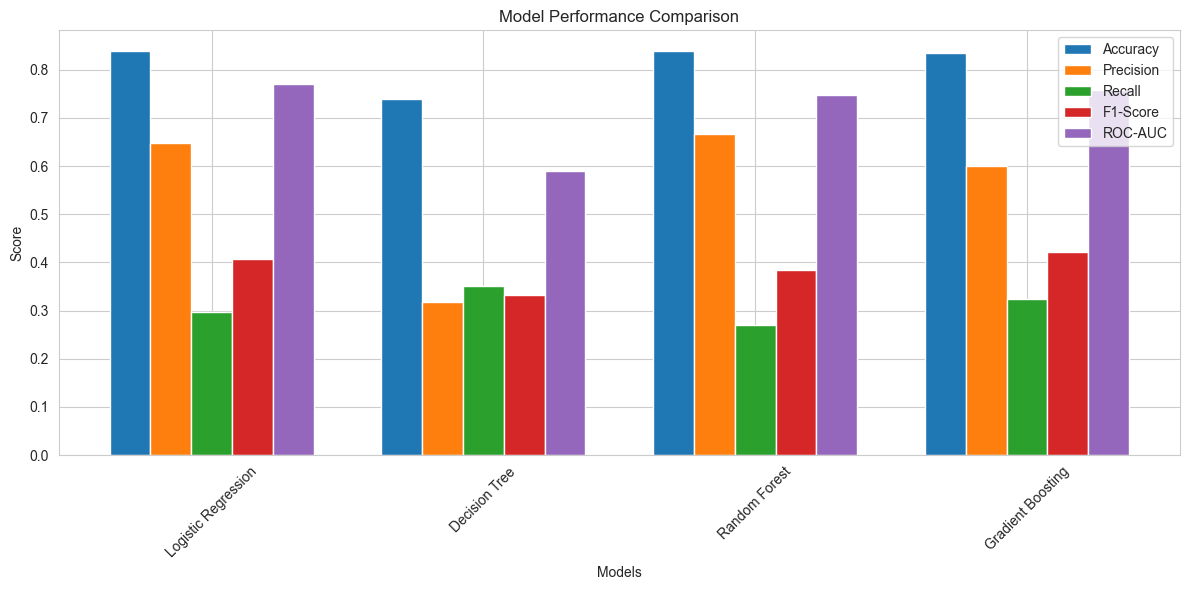

In [16]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1_score'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results]
})

print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
best_model = results[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"ROC-AUC Score: {results[best_model_name]['roc_auc']:.4f}")

plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(comparison_df))
width = 0.15

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, comparison_df[metric], width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width*2, comparison_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

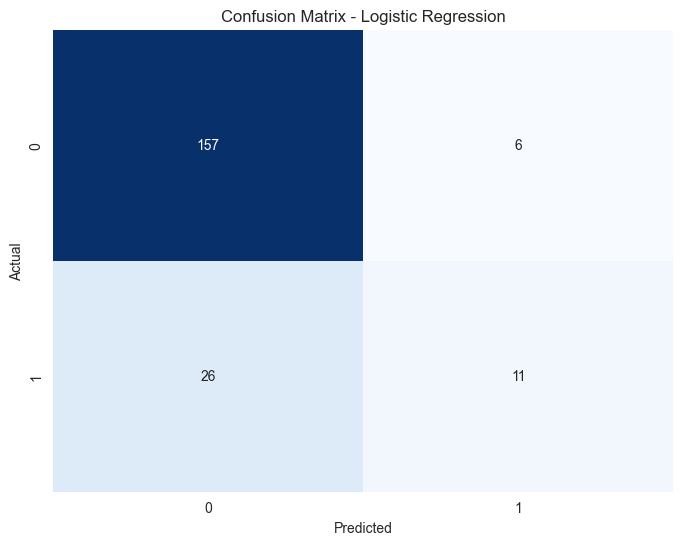


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

 Not Churned       0.86      0.96      0.91       163
     Churned       0.65      0.30      0.41        37

    accuracy                           0.84       200
   macro avg       0.75      0.63      0.66       200
weighted avg       0.82      0.84      0.81       200



In [17]:
y_pred_best = results[best_model_name]['predictions']

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nClassification Report - {best_model_name}:")
print(classification_report(y_test, y_pred_best, target_names=['Not Churned', 'Churned']))

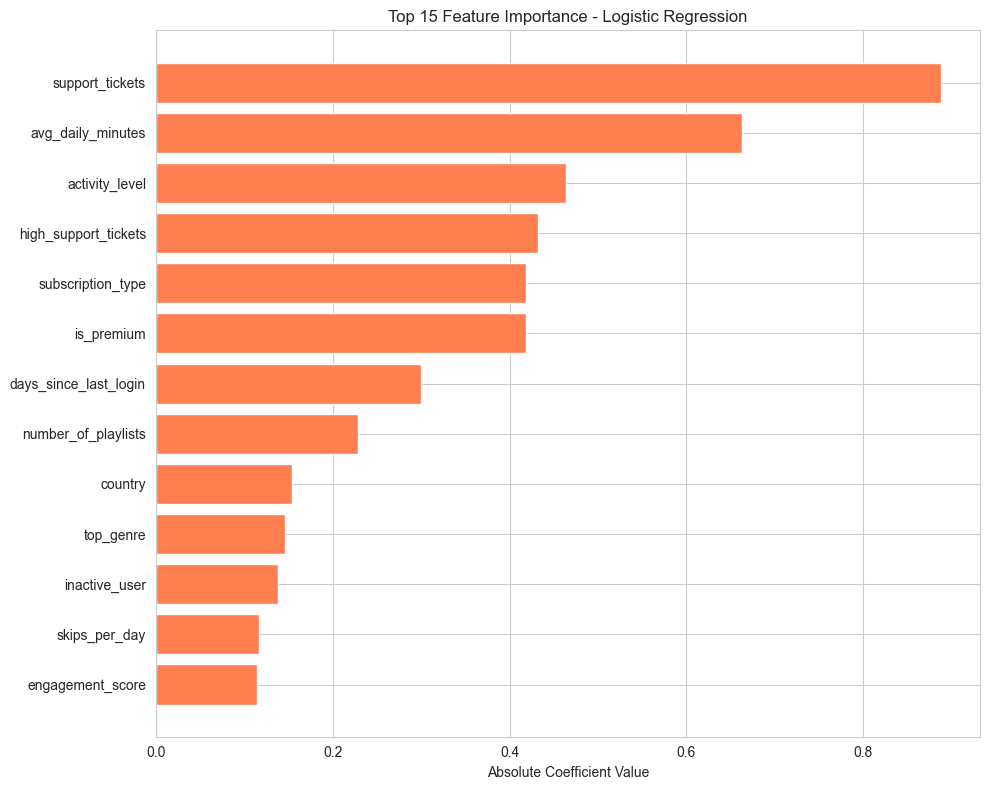


✅ Top 10 Most Important Features:
                  Feature  Coefficient
6         support_tickets     0.887544
2       avg_daily_minutes     0.662346
9          activity_level     0.464247
11   high_support_tickets     0.432600
0       subscription_type     0.419059
10             is_premium     0.419059
7   days_since_last_login     0.299701
3     number_of_playlists     0.228258
1                 country     0.153733
4               top_genre     0.146038


In [18]:
if best_model_name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['Feature'].head(15), feature_importance['Importance'].head(15), color='coral')
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Top 10 Most Important Features:")
    print(feature_importance.head(10))

elif best_model_name == 'Logistic Regression':
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': abs(best_model.coef_[0])
    }).sort_values('Coefficient', ascending=False)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['Feature'].head(15), feature_importance['Coefficient'].head(15), color='coral')
    plt.xlabel('Absolute Coefficient Value')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Top 10 Most Important Features:")
    print(feature_importance.head(10))
else:
    print(f"\n⚠️ Feature importance not available for {best_model_name}")

In [19]:
df_final = df.copy()

X_all_scaled = scaler.transform(X)
churn_probabilities = best_model.predict_proba(X_all_scaled)[:, 1]
churn_predictions = best_model.predict(X_all_scaled)

df_final['churn_probability'] = churn_probabilities
df_final['predicted_churn'] = churn_predictions

df_final['risk_level'] = pd.cut(df_final['churn_probability'], 
                                  bins=[0, 0.3, 0.6, 1.0],
                                  labels=['Low Risk', 'Medium Risk', 'High Risk'])

print("\nPrediction Summary:")
print(df_final['risk_level'].value_counts())

print("\nSample of High-Risk Customers:")
print(df_final[df_final['risk_level'] == 'High Risk'][['user_id', 'subscription_type', 
                                                          'churn_probability', 'churned']].head(10))


Prediction Summary:
risk_level
Low Risk       770
Medium Risk    176
High Risk       54
Name: count, dtype: int64

Sample of High-Risk Customers:
      user_id subscription_type  churn_probability  churned
6      user_7              Free           0.726447        0
47    user_48              Free           0.662830        0
50    user_51              Free           0.641459        0
56    user_57              Free           0.699150        1
58    user_59              Free           0.792374        1
63    user_64              Free           0.774384        0
93    user_94              Free           0.798649        1
112  user_113              Free           0.604004        1
134  user_135              Free           0.678158        1
156  user_157              Free           0.721397        1


In [20]:
powerbi_df = df_final[['user_id', 'subscription_type', 'country', 'avg_daily_minutes', 
                         'number_of_playlists', 'top_genre', 'skips_per_day', 
                         'support_tickets', 'days_since_last_login', 'churned',
                         'churn_probability', 'predicted_churn', 'risk_level',
                         'engagement_score', 'is_premium', 'inactive_user']]

powerbi_df.to_csv('spotify_churn_predictions_final.csv', index=False)

print("✅ Final dataset with predictions saved as 'spotify_churn_predictions_final.csv'")
print(f"\nDataset shape: {powerbi_df.shape}")
print("\nFirst 5 rows:")
print(powerbi_df.head())

✅ Final dataset with predictions saved as 'spotify_churn_predictions_final.csv'

Dataset shape: (1000, 16)

First 5 rows:
  user_id subscription_type country  avg_daily_minutes  number_of_playlists  \
0  user_1           Premium      US              134.9                    4   
1  user_2           Premium      PK              165.7                    5   
2  user_3              Free      DE               45.9                    3   
3  user_4           Premium      PK              106.0                    0   
4  user_5           Premium      US               89.6                    5   

    top_genre  skips_per_day  support_tickets  days_since_last_login  churned  \
0  Electronic              6                0                      1        0   
1         Pop              8                0                     12        0   
2   Classical              3                0                      3        0   
3        Jazz              7                0                      3        0  